#### 0. 설치 확인

In [3]:
import cv2
print(cv2.__version__)

4.9.0


#### 1. 이미지 읽어오기 및 정보 출력

In [4]:
image = cv2.imread("example_img1.png", cv2.IMREAD_UNCHANGED)
image
#알파 채널 없이 png 파일

array([[[109,  22,   6],
        [130,  50,  27],
        [164,  93,  60],
        ...,
        [141, 248, 252],
        [110, 228, 229],
        [ 94, 217, 215]],

       [[149,  66,  45],
        [136,  57,  30],
        [162,  91,  54],
        ...,
        [ 79, 183, 188],
        [132, 245, 248],
        [115, 235, 235]],

       [[132,  57,  25],
        [118,  44,   8],
        [195, 120,  76],
        ...,
        [ 90, 188, 194],
        [124, 230, 237],
        [143, 254, 255]],

       ...,

       [[ 35,  18,  45],
        [ 36,  20,  44],
        [ 35,  20,  41],
        ...,
        [ 37,  26,  34],
        [ 42,  30,  36],
        [ 38,  26,  32]],

       [[ 45,  33,  53],
        [ 41,  29,  47],
        [ 38,  26,  44],
        ...,
        [ 35,  24,  32],
        [ 40,  28,  34],
        [ 40,  26,  32]],

       [[ 47,  37,  53],
        [ 39,  29,  45],
        [ 36,  24,  42],
        ...,
        [ 30,  19,  27],
        [ 41,  27,  33],
        [ 44,  30,  36]]

In [13]:
#이미지 정보
print(image.shape) #세로, 가로, 채널명
# 채널 숫자가 몇 개 인지 꼭 확인
print(image.dtype)
print(image.ndim) # 차원수
print(image.size)
print(image.min())


(640, 1024, 3)
uint8
3
1966080
0


#### 2-1. 이미지 출력 - opencv로 출력해보기

In [5]:
cv2.imshow("basic image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 2-2. 이미지 출력 - matplotlib 로 출력해보기

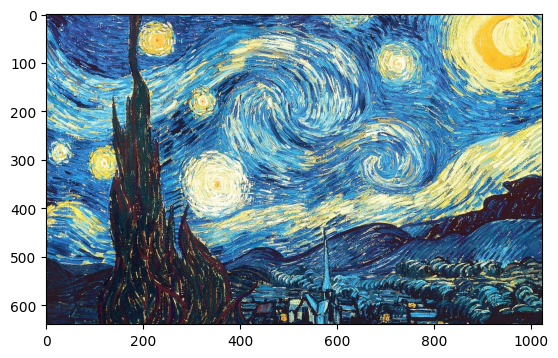

In [15]:
import matplotlib.pyplot as plt
#img_bgr = cv2.imread("duck2.webp")
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
# plt.axis('off')  # 축 표시 제거
plt.show()

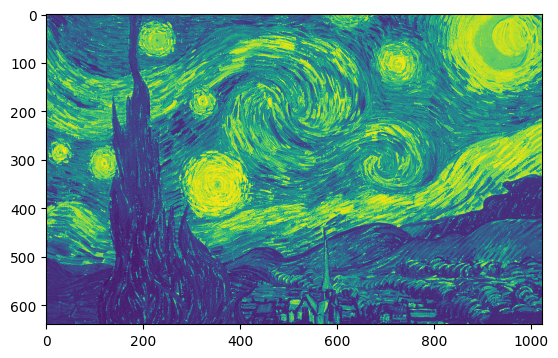

In [18]:
import matplotlib.pyplot as plt
#img_bgr = cv2.imread("duck2.webp")
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img_rgb)
# plt.axis('off')  # 축 표시 제거
plt.show()

#### 3. 이미지 저장

In [ ]:
cv2.imwrite("new_image_gray", img_gray)

#### 4-1. 픽셀 값에 접근 및 변경해보기

#### 4-2. 픽셀 값 다뤄보기 - ROI(Region of interest)추출<br>
roi = img[y+y+h, x:x+w] 방식으로 추출합니다

#### 4-3. 이미지 바꿔보기

In [7]:
star = cv2.imread("star.jpg")
print(star.shape)

(1024, 1024, 3)


#### 5-1. 이미지 채널 분리 및 합성해보기

In [5]:
img = cv2.imread("example_img1.png")
print(img.shape)

(640, 1024, 3)


In [8]:
img = cv2.imread("example_img1.png")
print(img.shape)

resized_star = cv2.resize(star, (128, 128))
img[128:256, 128:256] = resized_star
cv2.imshow("resized_img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(640, 1024, 3)


In [14]:
origin_img = cv2.imread("example_img1.png")

b, g, r = cv2.split(origin_img)
b = b + 50

img_merged = cv2.merge([b, g, r])
img_merged

cv2.imshow("img_merged", img_merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 어떤 색상은 보정해야하는 경우라던가..


#### 5-2. 채널 색상 변경 해보기

In [ ]:
img_merged_rgb = cv2.cvtColor(img_merged, cv2.COLOR_BGR2RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(7, 5))
plt.subplot(1,2,1)
plt.title("original_img")
plt.imshow(img_rgb)
plt.axis('off')  # 축 표시 제거

plt.subplot(1,2,2)
plt.title("merged_img")
plt.imshow(img_merged_rgb)
plt.axis('off')  # 축 표시 제거

plt.show()

#### 6-1. 이미지 변환해보기 - 컬러 및 흑백

In [17]:
import matplotlib.pyplot as plt

#### 6-2. 이미지 크기 조정

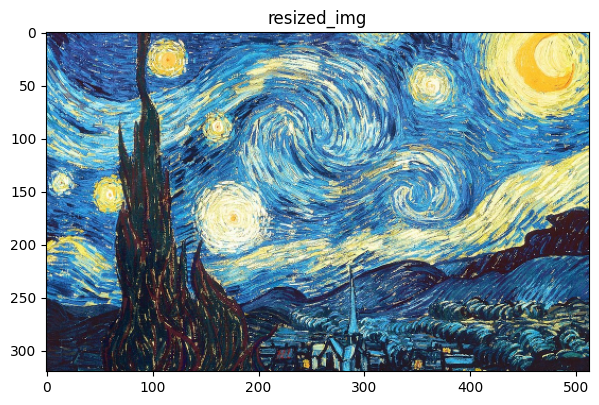

In [19]:
resized_img = cv2.resize(origin_img, (0,0), fx = 0.5, fy = 0.5)
resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(7, 5))
#plt.subplot(1,2,1)
plt.title("resized_img")
plt.imshow(resized_img_rgb)
#plt.axis('off')  # 축 표시 제거

#### 6-3. 이미지 회전

In [25]:
print(origin_img.shape)
#(640, 1024, 3)
# y    x    
center = ( origin_img.shape[1] // 2, origin_img.shape[0] // 2 ) # -> 이미지는 y, x 순이다
# 앞에 들어가는 값이 y값임 

print(center)
rotation_matrx_45 = cv2.getRotationMatrix2D(center, 45, 1.0)
rotation_img_45 = cv2.warpAffine(origin_img, rotation_matrx_45, (origin_img.shape[1], origin_img[0]))

rotation_img_rgb = cv2.cvtColor(rotation_img_rgb, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(7, 5))
#plt.subplot(1,2,1)
plt.title("rotation_img_rgb")
plt.imshow(rotation_img_rgb)
#plt.axis('off')  # 축 표시 제거


(640, 1024, 3)
(512, 320)


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'warpAffine'
> Overload resolution failed:
>  - Can't parse 'dsize'. Sequence item with index 1 has a wrong type
>  - Can't parse 'dsize'. Sequence item with index 1 has a wrong type


#### 6-4.이미지 뒤집기

#### 7. 마스크 이미지 적용

(640, 1024)


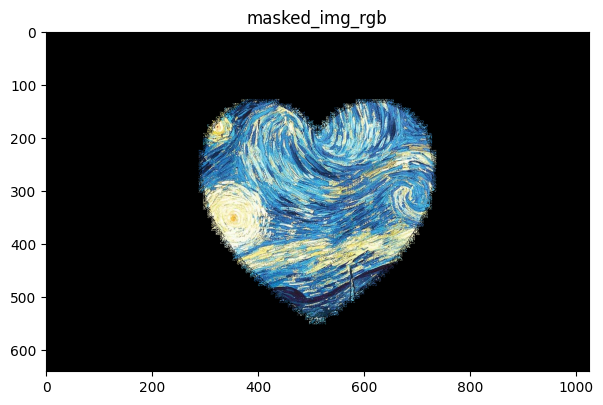

In [30]:
# 마스크 이미지와 origin 이미지 크기 같아야함 
mask_img = cv2.imread("mask_heart.jpg", cv2.IMREAD_GRAYSCALE)
print(mask_img.shape)
# 채널이 같아야하고 , 사이즈가 같아야하고


masked_img = cv2.bitwise_and(origin_img, origin_img, mask = mask_img)

masked_img_rgb = cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(7, 5))
#plt.subplot(1,2,1)
plt.title("masked_img_rgb")
plt.imshow(masked_img_rgb)




In [ ]:
def im_show(*opencv_images):
    img_number = len(opencv_images)
    plt.figure(figsize=(4*img_number,4))
    for idx, img in enumerate(opencv_images):
        plt.subplot(1, img_number, idx+1)

        # 그레이 스케일 이밎 처리
        if len(img.shape) == 2:
            # 그레이스케일 이미지
            plt.imshow(img, cmap='gray')
        else:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
        # plt.axis('off')  # 축 표시 제거
    plt.show()

In [33]:
# 원본 이미지 로드 (알파 채널 포함)
original_img = cv2.imread('example_img1.png')

# 알파 채널을 가진 마스크 이미지 로드
mask = cv2.imread('cat_face.png', cv2.IMREAD_UNCHANGED)
_, _, _, alpha_channel = cv2.split(mask)
# 앞에 3개 채널은 필요 없음 

print(mask.shape) # 500, 500 4개의 채널을 가짐



(500, 500, 4)


In [37]:
## 사이즈 맞추기
h, w = origin_img.shape[:2]
resized_mask = cv2.resize(alpha_channel, (w, h), interpolation=cv2.INTER_AREA) # 보간법
masked_img = cv2.bitwise_and(origin_img, origin_img, mask=resized_mask)

cv2.imshow("mask img", masked_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
def im_show(img_bgr_cv2):
    img_rgb = cv2.cvtColor(img_bgr_cv2, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5,6))
    plt.imshow(img_rgb)
    plt.show()
    #return img_rgb

640 1024
(640, 1024)


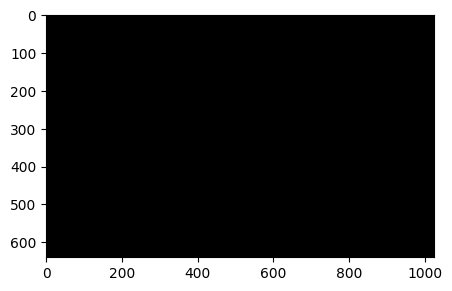

In [41]:
# 이미지 사이즈를 좀 더 조정해보기 -> 가운데에 형태를 보전해보기
# 검은색 이미지를 만들고 

import numpy as np
print(h, w)

center_mask = np.zeros((h, w), dtype=np.uint8)
print(center_mask.shape)
im_show(center_mask)


(500, 500)


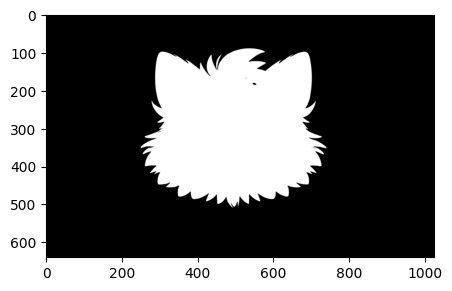

In [43]:
cat_face = cv2.imread('cat_face.png', cv2.IMREAD_UNCHANGED) # 알파 채널 이미지
_, _, _, alpha_channel = cv2.split(cat_face)

print(alpha_channel.shape)

center_mask[50: 550, 250:750] = alpha_channel
im_show(center_mask)


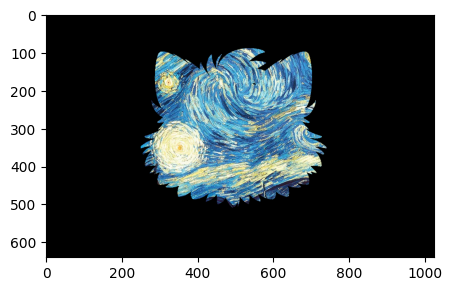

In [44]:
new_masked_img = cv2.bitwise_and(origin_img, origin_img, mask=center_mask)
im_show(new_masked_img)

In [ ]:
# 크기가 맞아야 합니다. 원본 이미지에 맞게 크기 조정
h, w = original_img.shape[:2] # shape 에서 반환되는 값은 h, w 순서
resized_mask = cv2.resize(alpha_channel, (w, h), interpolation=cv2.INTER_AREA)
masked_img = cv2.bitwise_and(original_img, original_img, mask=resized_mask)

cv2.imshow('masked_img_with_alpha', masked_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# matplotlib 로 출력하기
im_show(original_img, mask, masked_img)


#### 8-1. 효과 적용 - 가우시안 블러

#### 8-2. 엣지 검출

#### 8-3. 임계값 처리

#### 9. 기하학 변환

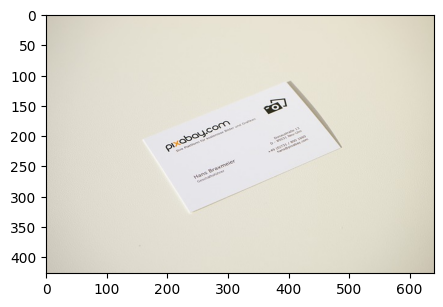

In [54]:
img = cv2.imread('business-card_640.jpg')
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# matplotlib 로 출력하기
im_show(img)

In [53]:
w,h = 720,480

srcQuad = np.array([[160,207],[395,112],[487,221],[239,327]],np.float32)
dstQuad = np.array([[0,0],[w-1,0],[w-1,h-1],[0,h-1]],np.float32)

pers = cv2.getPerspectiveTransform(srcQuad,dstQuad) #원근 행렬맵 생성
dst = cv2.warpPerspective(img,pers,(w,h)) #원근맵에 대한 기하학전 변형

cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

# matplotlib 로 출력하기
im_show(img, dst)

TypeError: im_show() takes 1 positional argument but 2 were given

#### 10-1. 이미지에 사각형, 원, 텍스트 표시 해보기

In [45]:
img = cv2.imread("example_img1.png")
# bbox 좌표를 설정합니다. (x, y)는 상자의 왼쪽 상단 모서리 좌표이고,
# w와 h는 각각 상자의 너비와 높이입니다.
x, y, w, h = 250, 250, 200, 200  # 예시 좌표입니다. 

# 이미지에 경계 상자를 그립니다. 여기서는 빨간색(0, 0, 255) 상자를 그리고, 선 두께는 2로 설정합니다.
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
cv2.imshow('Image with Bounding Box', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [48]:
# 원 그려보기
cv2.circle(img, (700, 200), 50, (255, 0, 0), -1)

# 텍스트 입력해보기
cv2.putText(img, "opencv study!!", (50, 600), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# 경계 상자가 그려진 이미지를 화면에 표시합니다.
cv2.imshow('Image with Bounding Box', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 10-2. 마우스로 그려보기

In [51]:
# 전역 변수 초기화
drawing = False # 마우스가 클릭된 상태인지 확인하기 위한 플래그
ix, iy = -1, -1 # 초기 위치
ex, ey = -1, -1 # 끝 위치

# 마우스 콜백 함수
def draw_rectangle(event, x, y, flags, param):
    global ix, iy, drawing, ex, ey

    if event == cv2.EVENT_LBUTTONDOWN: # 마우스 왼쪽 버튼을 누르면
        drawing = True
        ix, iy = x, y   # 초기 위치

    elif event == cv2.EVENT_MOUSEMOVE: # 마우스를 움직이면
        if drawing == True:
            ex, ey = x, y

    elif event == cv2.EVENT_LBUTTONUP: # 마우스 왼쪽 버튼을 떼면
        drawing = False
        ex, ey = x, y
        cv2.rectangle(img, (ix, iy), (ex, ey), (0, 0, 255), 2)

# 이미지 불러오기
img = cv2.imread("example_img1.png")
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_rectangle)

while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord("q"): # ESC 키를 누르면 종료
        break

cv2.destroyAllWindows()


#### 11. 마우스로 영역 지정후, 기하 변환

In [57]:
points = [] # 클릭한 점들을 저장할 리스트

# 마우스 콜백 함수 - 클릭 순서는 왼쪽상단부터 시계방향으로 클릭
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN and len(points) < 4: # 4개 미만의 점을 클릭한 경우
        points.append((x, y))
        cv2.circle(img, (x, y), 5, (0, 255, 0), -1) # 클릭한 위치에 초록색 원을 그림
        cv2.putText(img, f"{len(points)}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.imshow('Image', img)

        if len(points) == 4: # 4개의 점이 선택되었을 때
            warp_perspective()

def warp_perspective():
    # 변환될 이미지의 가로와 세로 크기를 정합니다.
    w, h = 300, 200
    src = np.float32(points) # 원본 이미지에서 4개의 점
    dst = np.float32([[0, 0], [w, 0], [w, h], [0, h]]) # 목적지 이미지에서 4개의 점

    # 원근 변환 행렬을 계산합니다.
    matrix = cv2.getPerspectiveTransform(src, dst)
    # 원근 변환을 적용합니다.
    result = cv2.warpPerspective(img, matrix, (w, h))

    cv2.imshow('Perspective Transformation', result)

# 이미지를 불러옵니다.
img = cv2.imread('business-card_640.jpg') # 'business-card_640.jpg'를 사용자의 이미지 경로로 변경해주세요.
cv2.imshow('Image', img)
cv2.setMouseCallback('Image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()